In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [20]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.0]
v0 = [0., 0., 0., 0.1, 0. , 0.]
N = 5

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#25) (generic function with 1 method)

In [21]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied


In [23]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate_snopt(x0,env,Δt,N,ctrl!,implicit_contact=true);

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

Implicit Contacts


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.47086    
 -8.79433e-10
 -8.57413    

elapsed time: 0.779897716 seconds


6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   6.93485  
  -6.2673e-7
 -15.1675   

6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   6.93485  
  -6.2673e-7
 -15.1675   

elapsed time: 0.774771568 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.5958    
  -3.92733e-6
 -13.1968    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.5958    
  -3.92733e-6
 -13.1968    

elapsed time: 0.775563908 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.38347e-7
 -11.7434    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.38347e-7
 -11.7434    

elapsed time: 0.772138515 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.11189   
  -1.09573e-6
 -12.2253    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.11189   
  -1.09573e-6
 -12.2253    

elapsed time: 0.805000211 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.95153   
  -1.93082e-7
 -11.9034    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.95153   
  -1.93082e-7
 -11.9034    

elapsed time: 0.806693449 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.92485   
  -5.54879e-8
 -11.8498    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.92485   
  -5.54879e-8
 -11.8498    

elapsed time: 0.797408228 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.8786    
   2.05158e-7
 -11.757     

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.8786    
   2.05158e-7
 -11.757     

elapsed time: 0.77306261 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.44277e-7
 -11.7434    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.44277e-7
 -11.7434    

elapsed time: 0.775261577 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.44617e-7
 -11.7434    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.44617e-7
 -11.7434    

elapsed time: 0.77850892 seconds


6-element Array{Float64,1}:
   0.0    
   0.0    
   0.0    
   5.87186
   2.43e-7
 -11.7434 

6-element Array{Float64,1}:
   0.0    
   0.0    
   0.0    
   5.87186
   2.43e-7
 -11.7434 

elapsed time: 0.791024381 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.43036e-7
 -11.7434    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87186   
   2.43036e-7
 -11.7434    

elapsed time: 0.818387336 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.52211e-7
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.52211e-7
 -11.7441    

elapsed time: 0.796292784 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.79783   
   0.00136486
 -11.5561    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.79783   
   0.00136486
 -11.5561    

elapsed time: 0.79602711 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.58483e-7
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.58483e-7
 -11.7441    

elapsed time: 0.77248787 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.52362e-7
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   2.52362e-7
 -11.7441    

elapsed time: 0.78385271 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   7.79232e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   7.79232e-6
 -11.7441    

elapsed time: 0.785709549 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   3.07732e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   3.07732e-6
 -11.7441    

elapsed time: 0.838106072 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.85192e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.85192e-6
 -11.7441    

elapsed time: 0.832574927 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87216   
   8.46231e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87216   
   8.46231e-6
 -11.7441    

elapsed time: 0.790027539 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.91416e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.91416e-6
 -11.7441    

elapsed time: 0.893791535 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.86494e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.86494e-6
 -11.7441    

elapsed time: 0.806906599 seconds


6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   5.87215  
   5.8462e-6
 -11.7441   

6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   5.87215  
   5.8462e-6
 -11.7441   

elapsed time: 0.807584632 seconds


6-element Array{Float64,1}:
   0.0     
   0.0     
   0.0     
   5.87215 
   5.835e-6
 -11.7441  

6-element Array{Float64,1}:
   0.0     
   0.0     
   0.0     
   5.87215 
   5.835e-6
 -11.7441  

elapsed time: 0.819964907 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87216   
   8.52848e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87216   
   8.52848e-6
 -11.7441    

elapsed time: 0.777777873 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.02806e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.02806e-6
 -11.7441    

elapsed time: 0.779195308 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87217   
   8.83167e-7
 -11.744     

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87217   
   8.83167e-7
 -11.744     

elapsed time: 0.795535038 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.78358e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.78358e-6
 -11.7441    

elapsed time: 0.857752896 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.90477e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   5.90477e-6
 -11.7441    

elapsed time: 0.788659232 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01027e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01027e-6
 -11.7441    

elapsed time: 0.792229648 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.02894e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.02894e-6
 -11.7441    

elapsed time: 0.831071238 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01409e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01409e-6
 -11.7441    

elapsed time: 0.803093617 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01911e-6
 -11.7441    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.87215   
   6.01911e-6
 -11.7441    

elapsed time: 0.779894173 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.78395   
 -1.58285e-6
 -8.91711   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.78395   
 -1.58285e-6
 -8.91711   

elapsed time: 0.806274863 seconds
Terminated after numerical difficulties: current point cannot be improved


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.78395   
 -1.58285e-6
 -8.91711   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.78395   
 -1.58285e-6
 -8.91711   

elapsed time: 0.793142351 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.07858   
  -8.74837e-7
 -12.617     

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.07858   
  -8.74837e-7
 -12.617     

elapsed time: 0.778256124 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.47428   
   8.54279e-6
 -11.2186    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   5.47428   
   8.54279e-6
 -11.2186    

elapsed time: 0.782947896 seconds


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.31254  
 -1.0379e-5
 -8.57424  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.31254  
 -1.0379e-5
 -8.57424  

elapsed time: 0.800270438 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.7875    
 -1.94973e-5
 -7.57877   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.7875    
 -1.94973e-5
 -7.57877   

elapsed time: 0.833947177 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.97143   
  1.91568e-6
 -5.94192   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.97143   
  1.91568e-6
 -5.94192   

elapsed time: 0.813392336 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.98891   
  3.96275e-6
 -3.97606   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.98891   
  3.96275e-6
 -3.97606   

elapsed time: 0.815713733 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.32786   
 -2.34781e-6
 -9.14503   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.32786   
 -2.34781e-6
 -9.14503   

elapsed time: 0.834921369 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.32786   
 -2.34781e-6
 -9.14503   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.32786   
 -2.34781e-6
 -9.14503   

elapsed time: 0.816818986 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   4.31475   
  -2.09326e-5
 -12.2443    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   4.31475   
  -2.09326e-5
 -12.2443    

elapsed time: 0.883150698 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   7.81076   
  -3.72896e-5
 -19.2057    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   7.81076   
  -3.72896e-5
 -19.2057    

elapsed time: 0.833708415 seconds


6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   8.38115  
   4.0517e-5
 -17.9518   

6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   8.38115  
   4.0517e-5
 -17.9518   

elapsed time: 0.812476331 seconds


6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   7.83773  
  -4.2639e-5
 -15.2676   

6-element Array{Float64,1}:
   0.0      
   0.0      
   0.0      
   7.83773  
  -4.2639e-5
 -15.2676   

elapsed time: 0.829199524 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   8.54659   
  -9.49989e-6
 -17.2413    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   8.54659   
  -9.49989e-6
 -17.2413    

elapsed time: 0.839870981 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.73284   
   2.87414e-5
 -13.7128    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.73284   
   2.87414e-5
 -13.7128    

elapsed time: 0.870821422 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   7.17041   
   1.20523e-6
 -14.3347    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   7.17041   
   1.20523e-6
 -14.3347    

elapsed time: 0.796017478 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.88798   
  -2.02443e-5
 -13.7768    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.88798   
  -2.02443e-5
 -13.7768    

elapsed time: 0.778910883 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.88796   
   1.09046e-9
 -13.7759    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.88796   
   1.09046e-9
 -13.7759    

elapsed time: 0.800013259 seconds


6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.84135   
   1.08542e-7
 -13.6827    

6-element Array{Float64,1}:
   0.0       
   0.0       
   0.0       
   6.84135   
   1.08542e-7
 -13.6827    

elapsed time: 0.80882524 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.257018  
 -1.85426e-6
 -9.68107   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.257018  
 -1.85426e-6
 -9.68107   

elapsed time: 0.79418509 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.257018  
 -1.85426e-6
 -9.68107   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  0.257018  
 -1.85426e-6
 -9.68107   

elapsed time: 0.817769119 seconds


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.5413   
 -8.8295e-5
 -8.37693  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  1.5413   
 -8.8295e-5
 -8.37693  

elapsed time: 0.827391466 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.51721    
 -0.000117732
 -8.70808    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.51721    
 -0.000117732
 -8.70808    

elapsed time: 0.78235309 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.93697    
 -0.000158549
 -7.61175    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  2.93697    
 -0.000158549
 -7.61175    

elapsed time: 0.8415295 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.51768    
 -0.000388235
 -8.31996    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.51768    
 -0.000388235
 -8.31996    

elapsed time: 0.829022433 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.72519    
 -0.000367664
 -8.2586     

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.72519    
 -0.000367664
 -8.2586     

elapsed time: 0.822324326 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000666142
 -2.3506e-5  
  0.0356156  

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  0.000666142
 -2.3506e-5  
  0.0356156  

elapsed time: 0.89731571 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.88435    
  0.000994223
 -8.22769    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.88435    
  0.000994223
 -8.22769    

elapsed time: 0.834249014 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.97875   
 -0.00100648
 -8.20656   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.97875   
 -0.00100648
 -8.20656   

elapsed time: 0.879314288 seconds


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.0105   
  0.0107709
 -8.19981  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.0105   
  0.0107709
 -8.19981  

elapsed time: 1.025301945 seconds


6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.04341  
  0.0091408
 -8.19194  

6-element Array{Float64,1}:
  0.0      
  0.0      
  0.0      
  4.04341  
  0.0091408
 -8.19194  

elapsed time: 0.817616534 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.07361   
 -0.00190086
 -8.18651   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.07361   
 -0.00190086
 -8.18651   

elapsed time: 0.857628561 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.07544   
 -0.00120786
 -8.19195   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.07544   
 -0.00120786
 -8.19195   

elapsed time: 0.884878797 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.04449e-9
  9.74759e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.04449e-9
  9.74759e-9
 -9.80998   

elapsed time: 0.835921865 seconds
Finished successfully: optimality conditions satisfied


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.04449e-9
  9.74759e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.04449e-9
  9.74759e-9
 -9.80998   

elapsed time: 0.789253502 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  5.56527e-9
 -1.30498e-9
 -9.80997   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  5.56527e-9
 -1.30498e-9
 -9.80997   

elapsed time: 0.774834129 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.25759e-8
  8.31611e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.25759e-8
  8.31611e-9
 -9.80998   

elapsed time: 0.825172718 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -6.75219e-9
  3.54149e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -6.75219e-9
  3.54149e-9
 -9.80998   

elapsed time: 0.844332671 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.25669e-8
 -1.17921e-8
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.25669e-8
 -1.17921e-8
 -9.80998   

elapsed time: 0.867634214 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.19352e-9
  3.19235e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.19352e-9
  3.19235e-9
 -9.80998   

elapsed time: 0.770092778 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.72076e-9
  5.52135e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.72076e-9
  5.52135e-9
 -9.80998   

elapsed time: 0.801698009 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.16995e-8
 -3.72943e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.16995e-8
 -3.72943e-9
 -9.80998   

elapsed time: 0.865899892 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.29696e-8
 -6.18104e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.29696e-8
 -6.18104e-9
 -9.80998   

elapsed time: 0.813823829 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -7.20713e-9
 -1.7901e-8 
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -7.20713e-9
 -1.7901e-8 
 -9.80998   

elapsed time: 0.812637459 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.97863e-9
 -1.42397e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.97863e-9
 -1.42397e-9
 -9.80998   

elapsed time: 0.824217567 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.13722e-8
  1.63207e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.13722e-8
  1.63207e-9
 -9.80998   

elapsed time: 0.814804744 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -8.16509e-9
 -7.85e-9   
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -8.16509e-9
 -7.85e-9   
 -9.80998   

elapsed time: 0.808140943 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  8.44798e-9
  2.49269e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  8.44798e-9
  2.49269e-9
 -9.80998   

elapsed time: 0.804093109 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.44245e-9
 -3.02977e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.44245e-9
 -3.02977e-9
 -9.80998   

elapsed time: 0.807387903 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.4752e-9  
  1.87567e-11
 -9.80998    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.4752e-9  
  1.87567e-11
 -9.80998    

elapsed time: 0.82394352 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.95853e-9
 -6.36705e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  3.95853e-9
 -6.36705e-9
 -9.80998   

elapsed time: 0.903007209 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.41791e-9
  4.75903e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  2.41791e-9
  4.75903e-9
 -9.80998   

elapsed time: 0.851706888 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.26119e-8
 -2.26359e-8
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -1.26119e-8
 -2.26359e-8
 -9.80998   

elapsed time: 0.812331978 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.73193e-9
  3.34662e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.73193e-9
  3.34662e-9
 -9.80998   

elapsed time: 0.774398401 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.58591e-8
  1.12623e-8
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  1.58591e-8
  1.12623e-8
 -9.80998   

elapsed time: 0.788968193 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -2.95868e-10
  2.07347e-9 
 -9.80998    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
 -2.95868e-10
  2.07347e-9 
 -9.80998    

elapsed time: 0.873631876 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -2.0191e-8 
  6.63657e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
 -2.0191e-8 
  6.63657e-9
 -9.80998   

elapsed time: 0.859422264 seconds


6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.86573e-9
  1.81989e-9
 -9.80998   

6-element Array{Float64,1}:
  0.0       
  0.0       
  0.0       
  4.86573e-9
  1.81989e-9
 -9.80998   

elapsed time: 0.831750486 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  7.28445e-11
 -1.94504e-10
 -9.80998    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  7.28445e-11
 -1.94504e-10
 -9.80998    

elapsed time: 0.804480048 seconds
elapsed time: 0.890093369 seconds
Finished successfully: requested accuracy could not be achieved


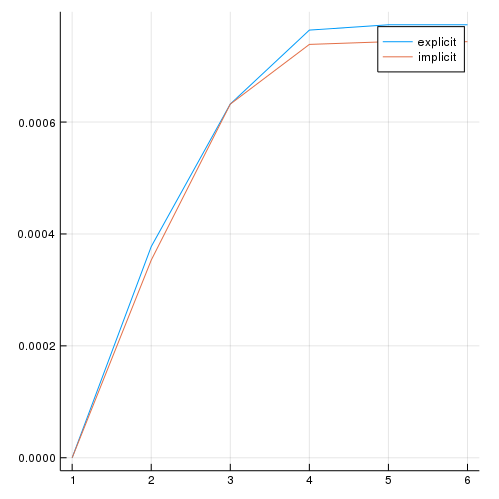

In [24]:
ts = cumsum([Δt for i in 1:N]);
j = 5
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")